In [2]:
#Loading libraries
library(tidyverse)
library(tidymodels)
set.seed(7)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

# Introduction to the dataset

Diabetes is a chronic condition that affects many individuals. It interrupts the process of obtaining energy. During metabolism the body breaks down food into glucose (sugar). This gets released into the bloodstream creating a signal that triggers the release of insulin by the pancreas. The release of insulin allows the body to recognize the sugar as energy which can be used by cells, decreasing the level of glucose in the blood. When an individual is diabetic, the body does not make enough insulin impacting the uptake of sugar from the bloodstream. This causes many health conditions such as heart disease, kidney disease, and much more. 

This dataset is obtained from the National Institute of Diabetes and Digestive and Kidney Disease. It considers female patients from a Pima Indian heritage that are at least 21 years old.  

The goal of this project is to identify whether individuals have diabetes based on diagnostic  measurements. The medical predictors being considered as the diagnostic measurements include, glucose levels, BMI, insulin, pregnancy, and diabetes pedigree function. 


# Methods

- Cleaned data and did exploratory analysis
- Visualization of results
- Chose our predictors 
- Classification (explained below) 

Renamed the results from the outcome column from the original data set, ‘1’ to Diabetic and ‘0’ to Non Diabetic. We also used the as_factor() function to set outcome to categorical data. We then cleaned the data by removing rows which contained NA values in columns like Glucose, Blood Pressure and BMI. And we used the head() function to show the first few rows of the cleaned data. 

After that, we splitted the cleaned data into testing and training data, we set the split ratio to 80% training observations (about 2200) and 20% testing observations (about 500). 

Grouped up people who are Non-diabetic and Diabetic and calculated the respective means of the 8 variables: pregnancies, glucose, blood pressure, skin thickness, insulin, BMI, diabetes pedigree function and age of those 2 different groups. 

We then created 6 diagrams from the cleaned data. 

1st graph: Bar chart to show the numbers of non Diabetic patients vs Diabetic patients from the data set. 

2nd graph: Scatter plot to show the relationship between Glucose and Insulin, with points that were coloured in red for Non-daibetic and blue for Diabetic based on the outcome. 

3rd graph Line graph that shows the relationship between the average BMI and number of pregnancies. 

4th graph: Scatter plot to show the relationship between the Diabetes Pedigree Function and Glucose, with points that were coloured in red for Non-daibetic and blue for Diabetic based on the outcome.

5th graph: Scatter plot to show the relationship between the Diabetes Pedigree Function and Insulin, with points that were coloured in red for Non-daibetic and blue for Diabetic based on the outcome.

6th graph: Scatter plot to show the relationship between the Diabetes Pedigree Function and BMI, with points that were coloured in red for Non-daibetic and blue for Diabetic based on the outcome.

**Importing the data**

In [3]:
url <- "https://raw.githubusercontent.com/akshaj-24/DSCI_100_group07/main/data/Diabetes_data.csv"

diabetes_data <- read_csv(url)

diabetes_data <- diabetes_data |>  # Setting Outcome as a categorical data since we are predicting this
                mutate(Outcome = as_factor(Outcome)) |>
                mutate(Outcome = fct_recode(Outcome, "Diabetic" = "1", "Non-Diabetic" = "0")) |> #Renaming the categories
                mutate(Outcome = as_factor(Outcome)) |>
                filter(Glucose>0) |> #Filtering NA values
                filter(BloodPressure>0) |>
                filter(BMI>0)

head(diabetes_data)

Rows: 2768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Pregnancies Glucose BloodPressure SkinThickness Insulin BMI 
1 6           148     72            35              0     33.6
2 1            85     66            29              0     26.6
3 8           183     64             0              0     23.3
4 1            89     66            23             94     28.1
5 0           137     40            35            168     43.1
6 5           116     74             0              0     25.6
  DiabetesPedigreeFunction Age Outcome     
1 0.627                    50  Diabetic    
2 0.351                    31  Non-Diabetic
3 0.672                    32  Diabetic    
4 0.167                    21  Non-Diabetic
5 2.288                    33  Diabetic    
6 0.201                    30  Non-Diabetic

**Variables:**

1. Pregnancies: Represents number of pregnancies for patients.
2. Glucose: Represents glucose levels for patients on a scale of mg/dL. A level of <99 mg/dL means normal levels, 100-125 mg/dL indicates pre-diabetes, and >126 mg/dL means diabetes.
3. BloodPressure: Average blood pressure for patients in mmHg. A level of below 80 is considered normal.
4. SkinThickness: Normal levels are 1 to 4 mm. Units here are mm^-1.
5. Insulin: Represents Insulin levels in mlU/L. Varies based on diabetic and glucose levels.
6. BMI: Represents obesity levels (based on Height and Weight). It is measured in kg/m^2. A normal BMI range is 18.5 to 24.9.
7. DiabetesPedigreeFunction: Represents the probability that a patient will have Diabetes on a scale of 0.08 to 2.42.
8. Age: Age of patients in years.
9. Outcome: Represents if patients tested positive for Diabetes. Categorical variable (Yes/No).

In [21]:
# Splitting the data into training and testing data

diabetes_split <- initial_split(diabetes_data, prop = 0.81, strata = Outcome) #Setting split to be 80% to roughly have 2200 training observations and 500 testing observations
diabetes_training <- training(diabetes_split)
diabetes_testing <- testing(diabetes_split)

nrow(diabetes_training)
nrow(diabetes_testing)

[1] 2110

[1] 496

**Exploratory Analysis**

In [22]:
mean_vals <- diabetes_training |>
                group_by(Outcome) |>
            summarize(mean_pregnancies = mean(Pregnancies),
                      mean_glucose = mean(Glucose),
                      mean_bp = mean(BloodPressure),
                      mean_skin_thickness = mean(SkinThickness),
                      mean_insulin = mean(Insulin),
                      mean_BMI = mean(BMI),
                      mean_DPF = mean(DiabetesPedigreeFunction),
                      mean_age = mean(Age))

mean_vals

Outcome      mean_pregnancies mean_glucose mean_bp  mean_skin_thickness
1 Non-Diabetic 3.300227         111.5770     70.66717 20.31387           
2 Diabetic     4.823009         140.4564     75.18205 23.41972           
  mean_insulin mean_BMI mean_DPF  mean_age
1  72.52767    30.74882 0.4433927 31.11372
2 105.45512    35.25398 0.5617876 36.22756

In [23]:
#ADD HIST PLOT FOR AGE 

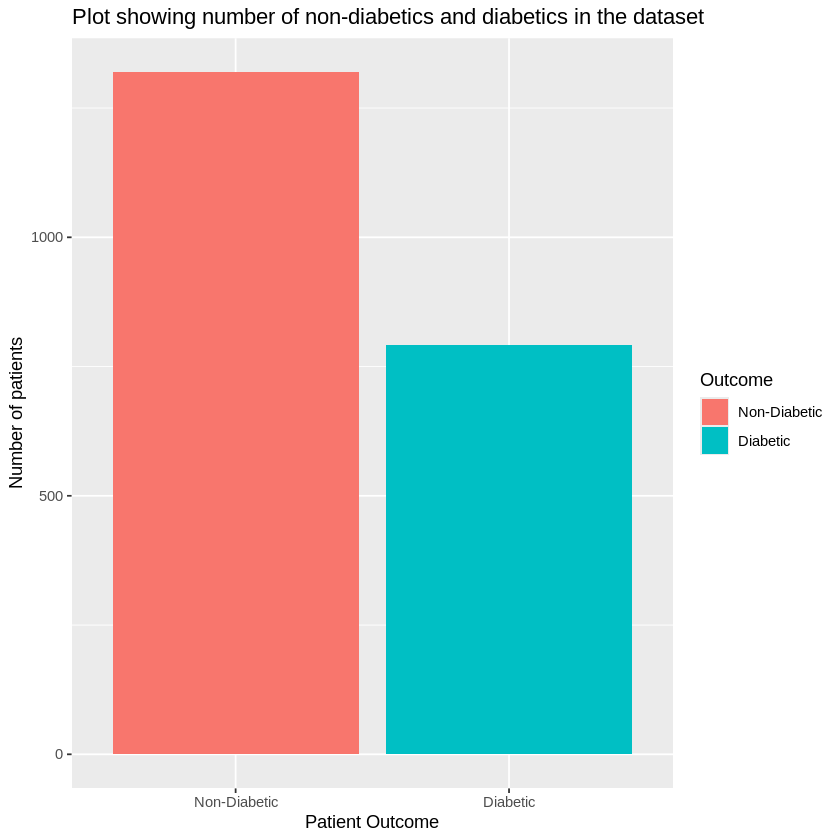

In [24]:
# PLOT 5: Show split of Diabetic outcomes in the data

diabetes_split <- ggplot(diabetes_training, aes(x=Outcome, fill = Outcome)) + 
                geom_bar() + 
                labs(x = "Patient Outcome",
                     y = "Number of patients") + 
                ggtitle("Plot showing number of non-diabetics and diabetics in the dataset")

diabetes_split

It can be observed that the number of diabetic people is around 850 out of 2200, making the dataset contain about 38.6% diabetics.

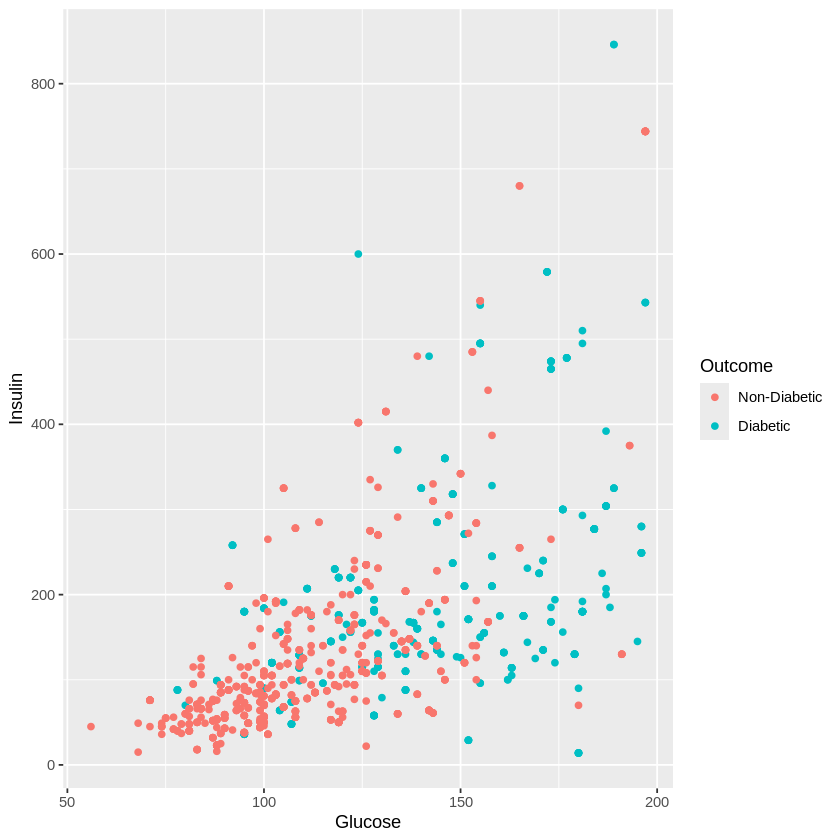

In [25]:
# PLOT 2: Glucose vs Insulin

glucose_insulin <- diabetes_training |>
            filter(Glucose > 0) |>
            filter(Insulin > 0) |>
            ggplot(aes(x = Glucose, y = Insulin, color = Outcome)) + 
            geom_point()

glucose_insulin

There is a strong positive relationship between the previous two variables, Insulin and Glucose. It can also be observed that the Diabetic patients have a higher Insluin and Glucose value than Non-diabetic patients.

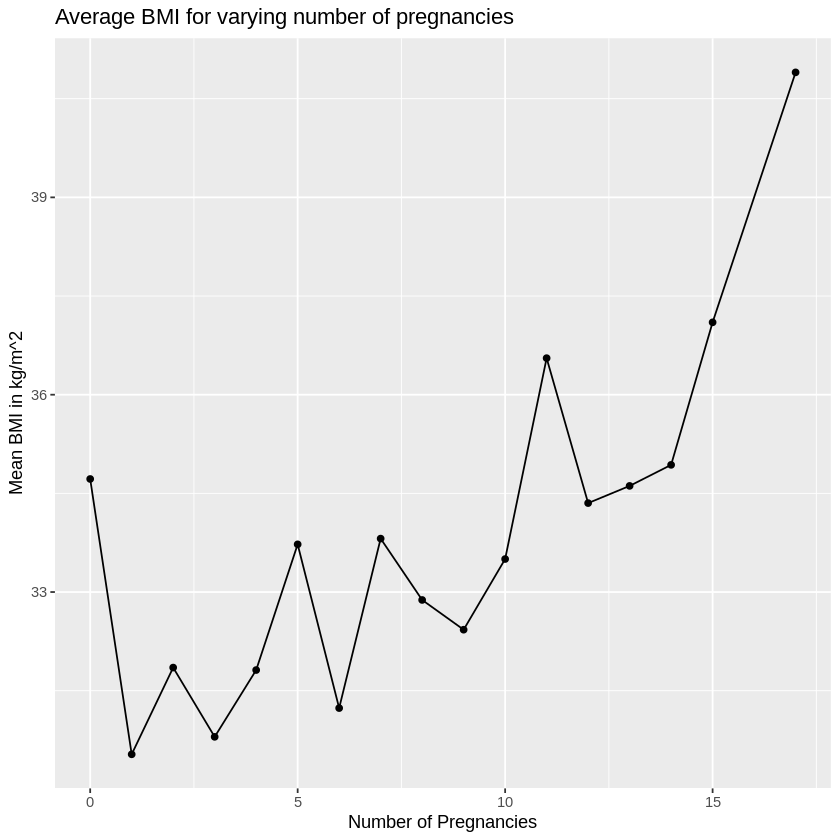

In [26]:
# PLOT 4: Pregnancies vs BMI

preg_BMI_data <- diabetes_training |>
#            filter(Pregnancies > 0) |>
            filter(BMI > 0) |>
            group_by(Pregnancies) |>
            summarize(BMI_mean = mean(BMI))

preg_BMI <- preg_BMI_data |>
            ggplot(aes(x = Pregnancies, y = BMI_mean)) + 
            geom_point() + 
            geom_line() +
            labs(x = "Number of Pregnancies",
                 y = "Mean BMI in kg/m^2") + 
            ggtitle("Average BMI for varying number of pregnancies")

preg_BMI

It can be seen that the average BMI increases for increasing number of pregnancies.

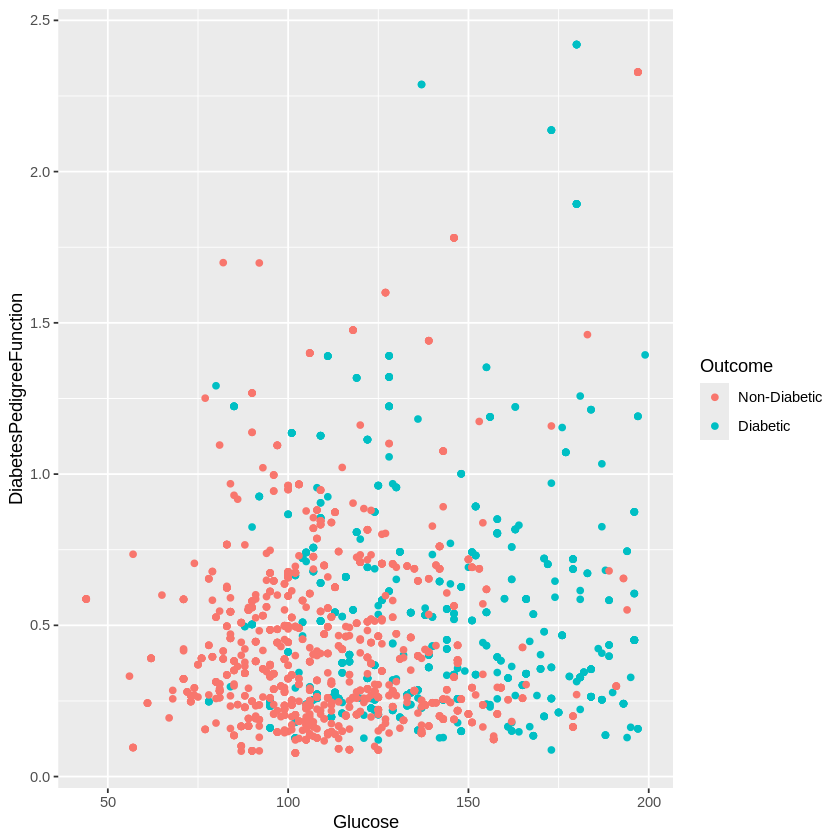

In [27]:
# age vs diabetes pedigree func

glucose_prob <- diabetes_training |>
            filter(Glucose > 0) |>
            ggplot(aes(x=Glucose, y= DiabetesPedigreeFunction, color=Outcome)) + 
            geom_point()


glucose_prob

There is a weak positive relationship between the DPF (Diabetes Pedigree Function) and Glucose. This indicates that for increasing glucose levels, there is an increased probability for Diabetes which is supported by the fact that Diabetic individuals have a higher Glucose level.

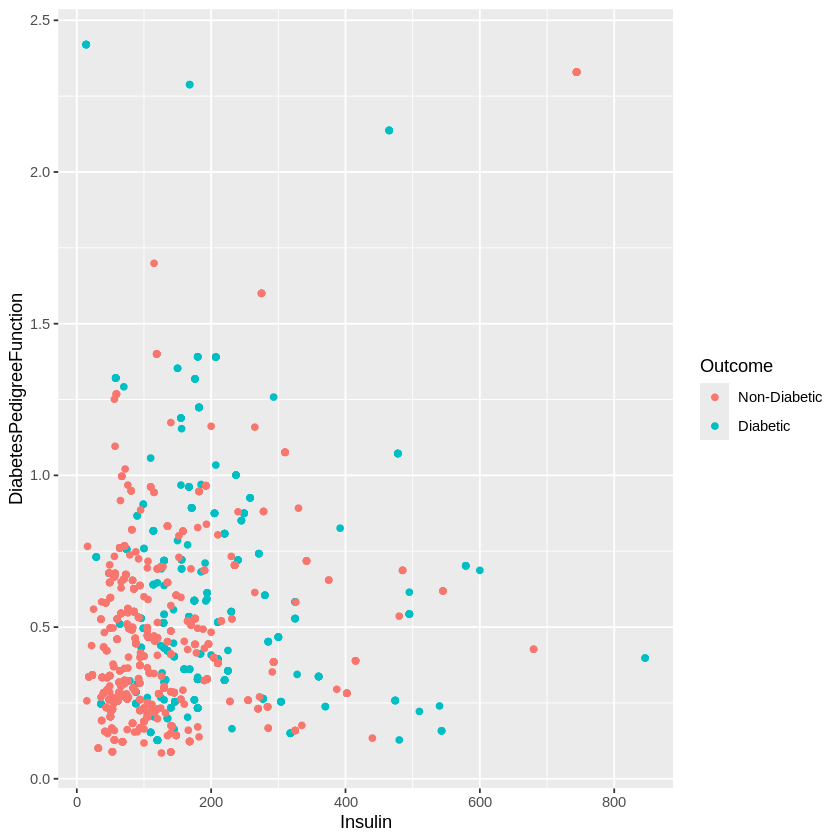

In [28]:
glucose_prob <- diabetes_training |>
            filter(Insulin > 0) |>
            ggplot(aes(x=Insulin, y= DiabetesPedigreeFunction, color = Outcome)) + 
            geom_point()


glucose_prob

There is a moderately positive relationship between the DPF (Diabetes Pedigree Function) and Insulin. This indicates that for increasing insulin levels, there is an increased probability for Diabetes. Diabetic individuals also have a higher mean insulin.

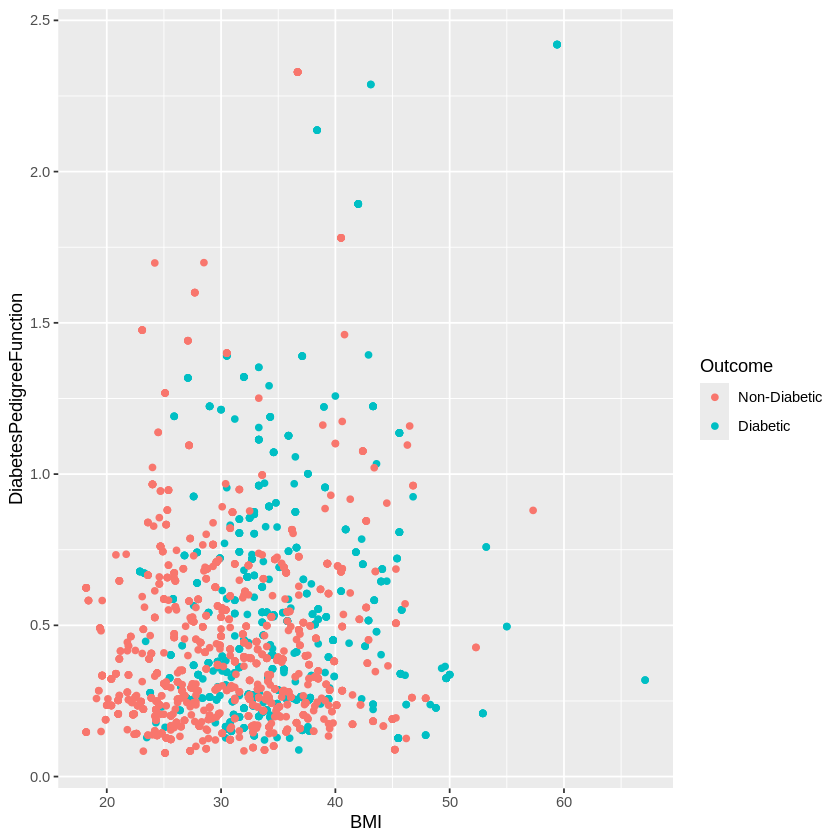

In [29]:
# age vs diabetes pedigree func

glucose_prob <- diabetes_training |>
            filter(BMI > 0) |>
            ggplot(aes(x=BMI, y= DiabetesPedigreeFunction, color= Outcome)) + 
            geom_point()


glucose_prob

There is a moderately positive relationship between the DPF (Diabetes Pedigree Function) and BMI. This indicates that for increasing BMI values, there is an increased probability for Diabetes. It can also be seen that Diabetic individuals generally have a higher BMI.

# Choosing our predictors:

Based on the graphs abouve, we can say that the following variables have an effect on the Outcome:
1. Glucose
2. BMI
3. Pregnancies
4. Insulin

# Classification

**Finding our best K values:**

Our goal is to find the best value for the $k$-nearest neighbours, providing the highest accuracy in predictions. In the code below, we create a classifier and perform cross-validation to split the training data, train the model with one set and use the other to evaluate it because we can not use testing data. Our next steps are:

1. Use the recipe function to center and scale the data.
2. Perform cross-validation with ten folds, using vfold_cv, on the training data. We use ten folds because if we only split the data once, the results strongly depend on the observations that end up being in the validation set, so using more folds increases the accuracy.
3. Create a k-nearest model with neighbours = tune() instead of a value to find the best value of k-nearest neighbours.
4. Add the recipe and model to a workflow, using tune_grid to fit. This worfklow runs cross validation on a range of k-nearest neighbours values that is specified in gridvals.
5. Find the best k value by filtering for accuracy and plotting a line plot with the accuracy estimate on the y-axis and k on the x-axis.
6. Seeing that there is no overfitting and underfitting in the classifier.

In [40]:
#Creating recipe and performing standardization
diabetes_recipe <- recipe(Outcome ~ Glucose + BMI + Pregnancies + Insulin, data = diabetes_training) |>
                    step_scale(all_predictors()) |>
                    step_center(all_predictors())

#K-nearest neighbor spec
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

#10-fold cross validation
diabetes_vfold <- vfold_cv(diabetes_training, v = 10, strata = Outcome)

gridvals <- tibble(neighbors = seq(1:50))

# Create workflow
knn_results <- workflow() |>
      add_recipe(diabetes_recipe) |>
      add_model(knn_tune) |>
      tune_grid(resamples = diabetes_vfold, grid = gridvals) |>
      collect_metrics() |>  # Collect metrics, filter for accuracy
      filter(.metric == "accuracy") |>
      select(neighbors, mean) |>
      arrange(desc(mean))


head(knn_results)


neighbors mean     
1 1         0.9639966
2 2         0.9639966
3 3         0.9426763
4 4         0.9426763
5 5         0.9019222
6 6         0.9019222

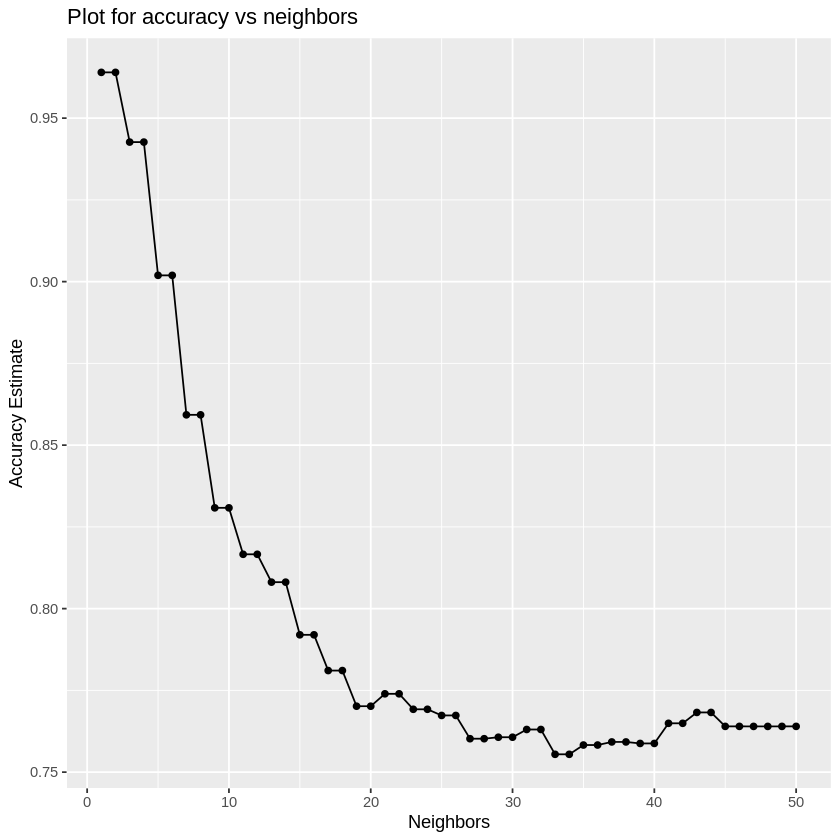

In [41]:
#Plotting a plot for accuracy vs neighbors


accuracy_versus_k <- ggplot(knn_results, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate") +
      ggtitle("Plot for accuracy vs neighbors") 

accuracy_versus_k

Based on this graph, we will choose k = 9 as our value despite it not having the highest accuracy. This is to prevent overfitting. Calculating accuracy for training dataset k=1, we get near 100% as the values are already seen by the model and a rough decision boundary is formed for k=1. When we calculate the accuracy for the unseen data it performs really bad that is the training error would be very low but the actual error would be very high. So it would be better if we choose an optimal k that has a lower accuracy but the error is less.

**Compare this to a majority classifier**

In [32]:
num_rows = nrow(diabetes_training)

proportions <- diabetes_training |>
                group_by(Outcome) |>
                summarize(count = n()) |>
                mutate(percentage = 100* (count / num_rows))

proportions

Outcome      count percentage
1 Non-Diabetic 1319  62.51185  
2 Diabetic      791  37.48815

Hence our k value is better than a majority classifier : EXPLAIN

**Building the final model**

In [36]:
set.seed(7)

knn_spec_final <- nearest_neighbor(weight_func="rectangular", neighbors = 9) |>
    set_engine("kknn") |>
    set_mode("classification")

fit <- workflow() |>
    add_recipe(diabetes_recipe) |>
    add_model(knn_spec_final) |>
    fit(data = diabetes_training)

fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(9,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.1601896
Best kernel: rectangular
Best k: 9

**Checking prediction metrics**

In [37]:
diabetes_training_predictions <- predict(fit, diabetes_training) |>
                                    bind_cols(diabetes_training)

diabetes_conf_mat <- diabetes_training_predictions |> 
                    conf_mat(truth=Outcome, estimate=.pred_class) 

head(diabetes_training_predictions)

diabetes_conf_mat

diabetes_accuracy <- diabetes_training_predictions|> 
                metrics(truth = Outcome, estimate = .pred_class) |>
                filter(.metric == "accuracy")

diabetes_accuracy

.pred_class  Pregnancies Glucose BloodPressure SkinThickness Insulin BMI 
1 Diabetic      6          148     72            35              0     33.6
2 Diabetic      8          183     64             0              0     23.3
3 Non-Diabetic  3           78     50            32             88     31.0
4 Diabetic     10          168     74             0              0     38.0
5 Non-Diabetic  1          189     60            23            846     30.1
6 Diabetic      5          166     72            19            175     25.8
  DiabetesPedigreeFunction Age Outcome 
1 0.627                    50  Diabetic
2 0.672                    32  Diabetic
3 0.248                    26  Diabetic
4 0.537                    34  Diabetic
5 0.398                    59  Diabetic
6 0.587                    51  Diabetic

              Truth
Prediction     Non-Diabetic Diabetic
  Non-Diabetic         1180       79
  Diabetic              139      712

.metric  .estimator .estimate
1 accuracy binary     0.8966825

**Finally testing the model**

In [38]:
set.seed(7)

diabetes_testing_predictions <- predict(fit, diabetes_testing) |>
                                bind_cols(diabetes_testing)

testing_conf_mat <- diabetes_testing_predictions |>
                    conf_mat(truth=Outcome, estimate=.pred_class)

testing_accuracy <- diabetes_testing_predictions |> 
                metrics(truth = Outcome, estimate = .pred_class) |>
                filter(.metric == "accuracy")

testing_accuracy

.metric  .estimator .estimate
1 accuracy binary     0.8427419

EXPLAIN CLASSIFIER